# ASSIGNMENT -2

# DATA PREPROCESSING

# IMPORT THE NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT THE DATA SET INTO DATAFRAME

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# VISUALIZATION

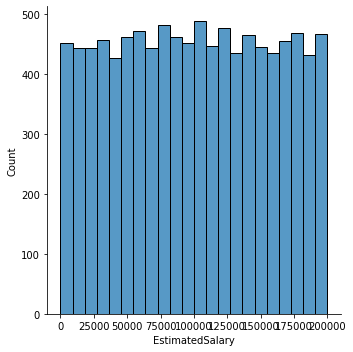

In [5]:
sns.displot(df['EstimatedSalary'])

<AxesSubplot:>

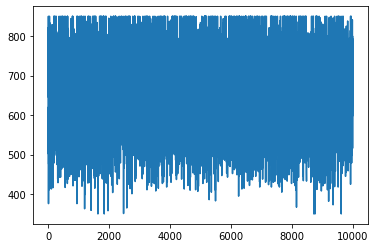

In [15]:
#univariate analysis
df.CreditScore.plot()

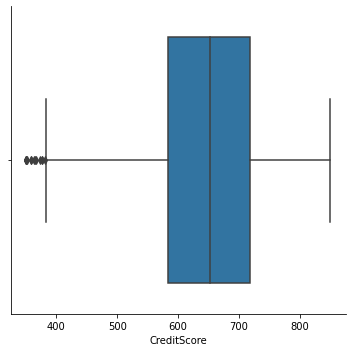

In [6]:
sns.catplot(x='CreditScore',kind='box',data=df)

<AxesSubplot:ylabel='CreditScore'>

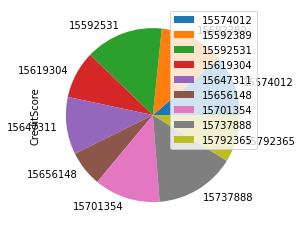

In [16]:
df[1:10].groupby(['CustomerId']).sum().plot(kind='pie', y='CreditScore')

C:\Users\darat\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


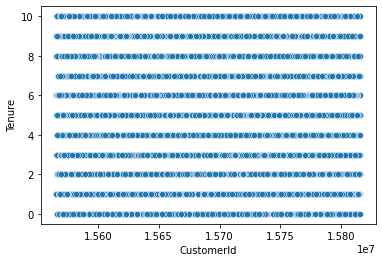

In [17]:
sns.scatterplot(df.CustomerId,df.Tenure)
plt.show()

<AxesSubplot:>

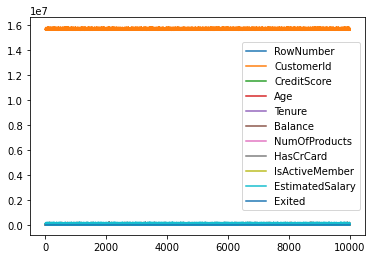

In [19]:
#multivariate analysis
df.plot()

<AxesSubplot:>

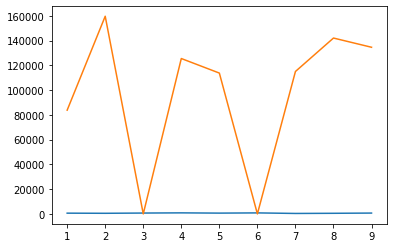

In [25]:
#bivariate analysis
df.CreditScore[1:10].plot()
df.Balance[1:10].plot() 

# DESCRIPTIVE ANALYSIS

In [31]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# CHECKING FOR MISSING VALUES

In [32]:
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [33]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# HANDLING VALUES

In [36]:
#No null values to handle

<AxesSubplot:>

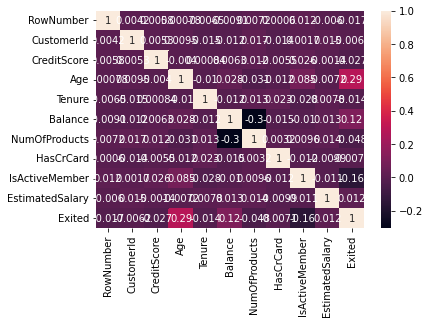

In [37]:
sns.heatmap(df.corr(),annot=True)

# OUTLIERS

C:\Users\darat\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='CreditScore'>

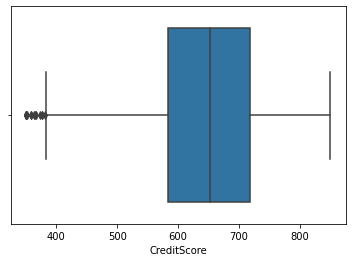

In [38]:
#occurence of outliers
sns.boxplot(df.CreditScore)

In [39]:
Q1= df.CreditScore.quantile(0.25)
Q3=df.CreditScore.quantile(0.75)

In [40]:
IQR=Q3-Q1

In [41]:
upper_limit =Q3 + 1.5*IQR
lower_limit =Q1 - 1.5*IQR

In [44]:
df['CreditScore'] = np.where(df['CreditScore']>upper_limit,30,df['CreditScore'])

C:\Users\darat\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='CreditScore'>

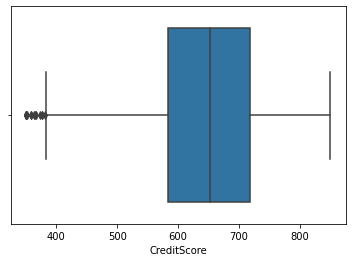

In [45]:
sns.boxplot(df.CreditScore)

# CATEGORICAL COLUMNS _ENCODING

In [46]:
#label encoder
from sklearn.preprocessing import LabelEncoder

In [47]:
le=LabelEncoder()

In [52]:
df.Gender= le.fit_transform(df.Gender)

In [54]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [55]:
#one hot encoding
df_main=pd.get_dummies(df,columns=['Geography'])
df_main.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


# SEPARATING INDEPENDENT AND DEPENDENT VARIABLES

In [70]:

X=df_main.drop(columns=['EstimatedSalary'],axis=1)
X.head()
X_scaled=pd.DataFrame(scale(X),columns=X.columns)
X_scaled.head()

,RowNumber,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Geography_France,Geography_Germany,Geography_Spain
0,-1.731878,-0.783213,-0.326221,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,1.977165,0.997204,-0.578736,-0.573809
1,-1.731531,-0.606534,-0.440036,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,-0.505775,-1.002804,-0.578736,1.742740
2,-1.731185,-0.995885,-1.536794,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,1.977165,0.997204,-0.578736,-0.573809
3,-1.730838,0.144767,0.501521,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.505775,0.997204,-0.578736,-0.573809
4,-1.730492,0.652659,2.063884,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.505775,-1.002804,-0.578736,1.742740


In [71]:
y=df_main.EstimatedSalary
y

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

# SCALING

In [72]:
from sklearn.preprocessing import scale

In [73]:
X_scaled=pd.DataFrame(scale(X),columns=X.columns)
X_scaled.head()

,RowNumber,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Geography_France,Geography_Germany,Geography_Spain
0,-1.731878,-0.783213,-0.326221,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,1.977165,0.997204,-0.578736,-0.573809
1,-1.731531,-0.606534,-0.440036,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,-0.505775,-1.002804,-0.578736,1.742740
2,-1.731185,-0.995885,-1.536794,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,1.977165,0.997204,-0.578736,-0.573809
3,-1.730838,0.144767,0.501521,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.505775,0.997204,-0.578736,-0.573809
4,-1.730492,0.652659,2.063884,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.505775,-1.002804,-0.578736,1.742740


# TRAIN AND TEST DATA

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X_scaled,y, test_size=0.3,random_state=0)

In [66]:
X_train.shape

(7000, 14)

In [67]:
X_test.shape

(3000, 14)

In [68]:
y_train.shape

(7000,)

In [69]:
y_test.shape

(3000,)